In [2]:
# Importing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_test.csv")
train = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_train.csv")
labels = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_labels_train.csv")

df = pd.merge(train, labels, on = ["city", "year", "weekofyear"])


# How do we deal with missing data? 

In [3]:
#What percentage of rows are missing from each column?
print(df.isnull().sum()/(len(df.city))*100)

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k                         0.686813
station_avg_temp_c             

# We would lose almost 20% of data if we dropped all NA rows


In [4]:
(len(df.dropna())/len(df))

0.823489010989011

# Unequal distribution of cases for both cities

In [48]:
df["city"].value_counts()

sj    727
iq    472
Name: city, dtype: int64

In [67]:
df.groupby("city")["total_cases"].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
iq,472.0,7.309322,9.521329,0.0,1.0,5.0,9.0,83.0
sj,727.0,30.214580,36.131809,0.0,9.0,18.0,36.0,329.0


In [21]:
sj = df[df['city'] == "sj"]
iq = df[df["city"] == "iq"]

Text(0,0.5,'Density')

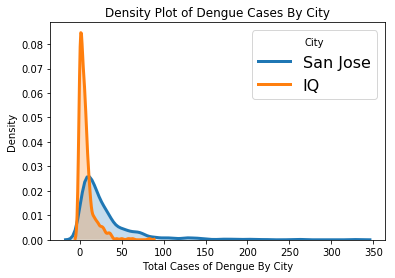

In [51]:
sns.distplot(sj["total_cases"], hist = False, kde = True,
                 kde_kws = {"shade":True,'linewidth': 3},
                 label = "San Jose")
    
sns.distplot(iq['total_cases'], hist = False, kde = True,
                 kde_kws = {"shade":True,'linewidth': 3},
                 label = "IQ",)

plt.legend(prop={'size': 16}, title = 'City')
plt.title('Density Plot of Dengue Cases By City')
plt.xlabel('Total Cases of Dengue By City')
plt.ylabel('Density')